In [192]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report


Importing the dataset and reading it with Pandas dataframe

In [193]:
df=pd.read_csv("Computers.csv")


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null object
multi      6259 non-null object
premium    6259 non-null object
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In the below code we will be changing the value of columns 'cd','multi' and 'premium' into binary values of 1 and 0.

In [195]:
cdNum={"yes":1,"no":0}

In [196]:
df.cd=[cdNum[i] for i in df.cd]

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null object
premium    6259 non-null object
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(9), object(2)
memory usage: 538.0+ KB


In [198]:
multi1={"yes":1,"no":0}
df.multi=[multi1[item] for item in df.multi]
df

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,0,0,yes,94,1
1,2,1795,33,85,2,14,0,0,yes,94,1
2,3,1595,25,170,4,15,0,0,yes,94,1
3,4,1849,25,170,8,14,0,0,no,94,1
4,5,3295,33,340,16,14,0,0,yes,94,1
5,6,3695,66,340,16,14,0,0,yes,94,1
6,7,1720,25,170,4,14,1,0,yes,94,1
7,8,1995,50,85,2,14,0,0,yes,94,1
8,9,2225,50,210,8,14,0,0,yes,94,1
9,10,2575,50,210,4,15,0,0,yes,94,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null int64
premium    6259 non-null object
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(10), object(1)
memory usage: 538.0+ KB


In [127]:
premium1={"yes":1,"no":0}
df.premium=[premium1[item] for item in df.premium]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null int64
premium    6259 non-null int64
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(11)
memory usage: 538.0 KB


In [128]:
df.describe()

,S.No.,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.      6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null int64
premium    6259 non-null int64
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(11)
memory usage: 538.0 KB


One Hot Encoding for the column screen as it has 3 categorical values

In [199]:
df=pd.get_dummies(df, columns=["screen"])

Getting the information about the modified dataset

In [200]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 13 columns):
S.No.        6259 non-null int64
price        6259 non-null int64
speed        6259 non-null int64
hd           6259 non-null int64
ram          6259 non-null int64
cd           6259 non-null int64
multi        6259 non-null int64
premium      6259 non-null object
ads          6259 non-null int64
trend        6259 non-null int64
screen_14    6259 non-null uint8
screen_15    6259 non-null uint8
screen_17    6259 non-null uint8
dtypes: int64(9), object(1), uint8(3)
memory usage: 507.4+ KB


Coverting the value of hard disk into binary as hard disk greater than 170 as 1 and less than  or equal to 170 as 0 

In [207]:
def hd_new(x):
    if type(x)==int:
        if x <=170:
            return 0
        else:
            return 1

df['hd_binary']=df['hd'].apply(hd_new)
df.head()

,S.No.,price,speed,hd,ram,cd,multi,premium,ads,trend,screen_14,screen_15,screen_17,hd_binary
0,1,1499,25,80,4,0,0,yes,94,1,1,0,0,0
1,2,1795,33,85,2,0,0,yes,94,1,1,0,0,0
2,3,1595,25,170,4,0,0,yes,94,1,0,1,0,0
3,4,1849,25,170,8,0,0,no,94,1,1,0,0,0
4,5,3295,33,340,16,0,0,yes,94,1,1,0,0,1


In [208]:
df.drop('hd', axis=1, inplace=True)

In [209]:
df.drop('trend', axis=1, inplace=True)

In [210]:
df.drop('multi', axis=1, inplace=True)

In [211]:
df.head()

,S.No.,price,speed,ram,cd,premium,ads,screen_14,screen_15,screen_17,hd_binary
0,1,1499,25,4,0,yes,94,1,0,0,0
1,2,1795,33,2,0,yes,94,1,0,0,0
2,3,1595,25,4,0,yes,94,0,1,0,0
3,4,1849,25,8,0,no,94,1,0,0,0
4,5,3295,33,16,0,yes,94,1,0,0,1


Checking for null values

In [212]:
df.isnull().sum()

S.No.        0
price        0
speed        0
ram          0
cd           0
premium      0
ads          0
screen_14    0
screen_15    0
screen_17    0
hd_binary    0
dtype: int64

No null value found. Data cleaning complete

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.No.        6259 non-null int64
price        6259 non-null int64
speed        6259 non-null int64
ram          6259 non-null int64
cd           6259 non-null int64
premium      6259 non-null object
ads          6259 non-null int64
screen_14    6259 non-null uint8
screen_15    6259 non-null uint8
screen_17    6259 non-null uint8
hd_binary    6259 non-null int64
dtypes: int64(7), object(1), uint8(3)
memory usage: 409.6+ KB


Finding the correlation between the dependent and independent variables of the dataset

In [214]:
df.corr()

,S.No.,price,speed,ram,cd,ads,screen_14,screen_15,screen_17,hd_binary
S.No.,1.000000,-0.199924,0.388566,0.265376,0.458642,-0.272714,-0.219054,0.168148,0.100139,0.350081
price,-0.199924,1.000000,0.300976,0.622748,0.197343,0.054540,-0.278018,0.153539,0.221398,0.306169
speed,0.388566,0.300976,1.000000,0.234760,0.258260,-0.215232,-0.233798,0.187292,0.094550,0.239066
ram,0.265376,0.622748,0.234760,1.000000,0.438504,-0.181670,-0.312840,0.293399,0.059119,0.365308
cd,0.458642,0.197343,0.258260,0.438504,1.000000,-0.061091,-0.180048,0.159893,0.048148,0.243492
ads,-0.272714,0.054540,-0.215232,-0.181670,-0.061091,1.000000,0.123791,-0.105182,-0.040588,-0.059645
screen_14,-0.219054,-0.278018,-0.233798,-0.312840,-0.180048,0.123791,1.000000,-0.811080,-0.388667,-0.227112
screen_15,0.168148,0.153539,0.187292,0.293399,0.159893,-0.105182,-0.811080,1.000000,-0.223707,0.171707
screen_17,0.100139,0.221398,0.094550,0.059119,0.048148,-0.040588,-0.388667,-0.223707,1.000000,0.107958
hd_binary,0.350081,0.306169,0.239066,0.365308,0.243492,-0.059645,-0.227112,0.171707,0.107958,1.000000


Plotting the heatmap

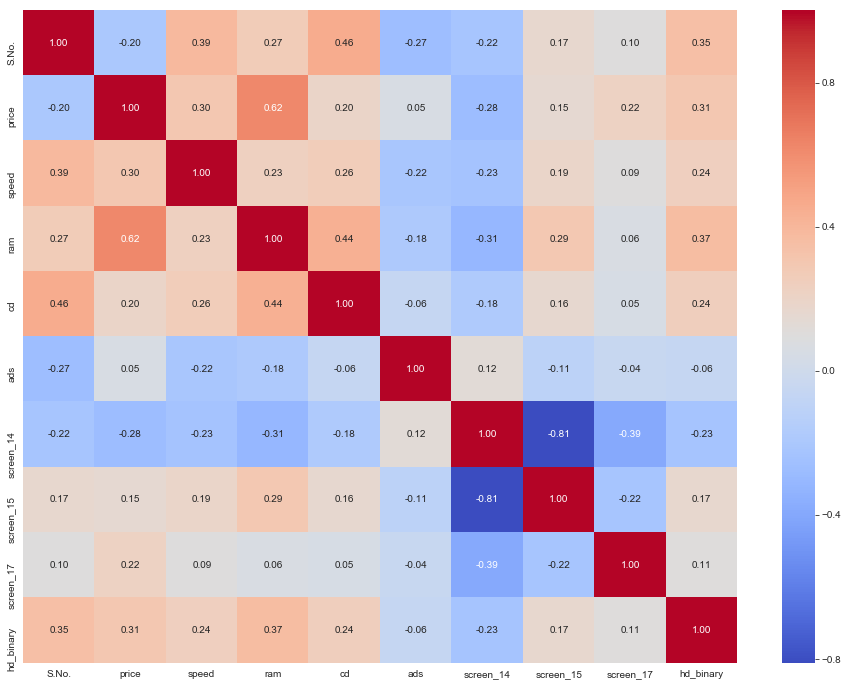

In [215]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

From the heatmap, we can understand that the major factors affecting the price of computers are speed, hd_binary, ram, screen_14, screen_15, screen_17, ads and cd. Now we can plot the heatmap just by taking these attributes

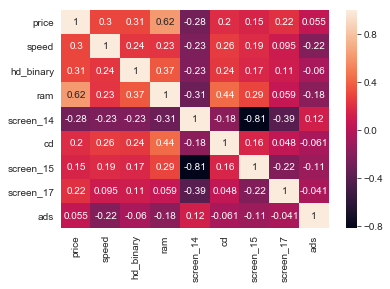

In [216]:
x=df[['price','speed','hd_binary','ram','screen_14','cd','screen_15','screen_17','ads','premium']]
sns.heatmap(x.corr(), annot=True)

From the heatmap we can understand that the major predictors affecting prices of computers are speed, hd_binary, ram, screen sizes and ads. Out of all the predictors only screen_14 is inversely related to prices. Also ads are not affecting prices in a big way but we will still consider as this is our only continous predictor in the dataset.

Plotting the pairplot for all the predictors.

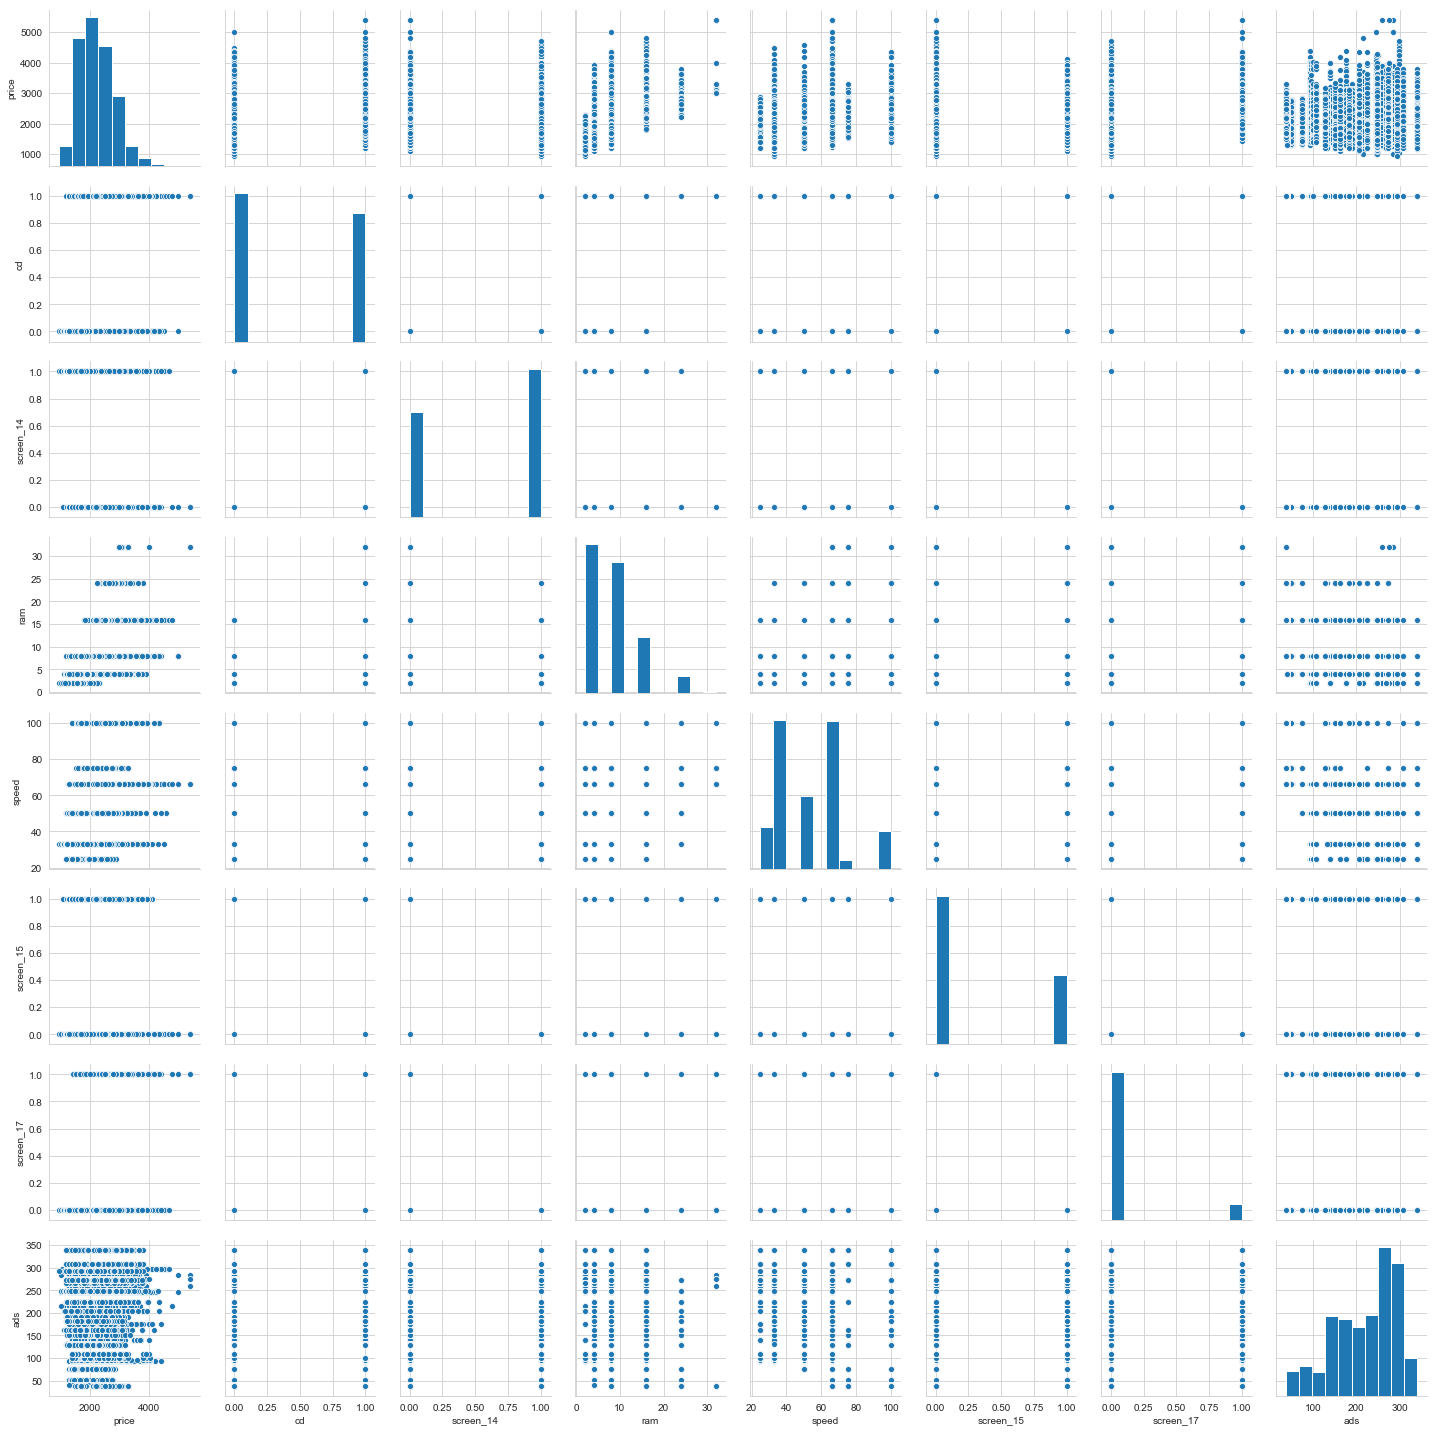

In [217]:
x=df[['price','cd','screen_14','ram','speed','screen_15','screen_17','ads']]
sns.pairplot(x)

# Model 1

Performing Least Square method for getting the value of AIC, BIC and Adjusted R square

In [218]:
y=df[['price']]
x=df[['hd_binary','cd','screen_14','ram','speed','screen_15','screen_17','ads']]
model =sm.OLS(y, x).fit()

In [219]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     905.1
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:25:44   Log-Likelihood:                -46525.
No. Observations:                6259   AIC:                         9.307e+04
Df Residuals:                    6251   BIC:                         9.312e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd_binary     82.7051     16.355      5.057      0.000      50.644     114.766
cd          -172.4952     11.783    -14.639      0.000    -195.595    -149.396
screen_14    972.3178     25.614     37.960      0.000     922.105    1022.530
ram           67.0767      1.114     60.197      0.000      64.892      69.261
speed          5.6226      0.266     21.106      0.000       5.100       6.145
screen_15    974.2000     28.311     34.411      0.000     918.701    1029.699
screen_17   1315.1132     31.508     41.739      0.000    1253.347    1376.880
ads            1.6913      0.072     23.571      0.000       1.551       1.832
==============================================================================
Omnibus:                     1424.013   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3890.802
Skew:                           1.207   Prob(JB):                         0.00
Kurtosis:                       6.015   Cond. No.                     2.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here the value of AIC and BIC is very high and adjusted R square is very low. There fore we can assume that this model might not be the best model. However we need to understand Null hypothesis to ascertain the predictors important for Linear regression. In this model, the least significant predictor is cd.

Performing Linear Regression on our first model

In [147]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['hd_binary','screen_14','cd','ram','speed','screen_15','screen_17','ads']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [148]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 405.67630989834015 msle_train: 0.03333478222809921
rmse_test: 417.8649570302826 msle_test: 0.03425499374591771


Performing Cross Validation on Model 1


In [149]:
cols_to_use=['hd_binary','screen_14','cd','ram','speed','screen_15','screen_17','ads']
X=df[cols_to_use]
y=df.price

In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [151]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-512.87112628 -363.04256134 -785.68570284]


In [152]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 553.866463


Calaculating multicollinearity amongst the predictors

In [153]:
def variance_IF(x):
    vif=vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["features"] = x.columns
    return vif

variance_IF(x)

,VIF Factor,features
0,1.210681,hd_binary
1,1.288879,cd
2,14.320808,screen_14
3,1.469018,ram
4,1.185333,speed
5,9.519332,screen_15
6,3.586902,screen_17
7,1.075886,ads


By perfroming multicollinearity we found that screen sizes are the most collinear predictor and therefore we should exclude them in our next model

## Model2

Performing Ordinary Least Square method on our new set of predictors

In [154]:
y=df[['price']]
x=df[['hd_binary','ram','speed','ads','cd']]
model =sm.OLS(y, x).fit()

In [155]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 2.921e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:28:49   Log-Likelihood:                -47323.
No. Observations:                6259   AIC:                         9.466e+04
Df Residuals:                    6254   BIC:                         9.469e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd_binary    308.4380     17.458     17.667      0.000     274.214     342.662
ram           74.7980      1.215     61.579      0.000      72.417      77.179
speed         11.0490      0.258     42.887      0.000      10.544      11.554
ads            3.6883      0.054     67.865      0.000       3.582       3.795
cd          -206.0483     13.339    -15.447      0.000    -232.197    -179.899
==============================================================================
Omnibus:                     1037.309   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2055.677
Skew:                           1.009   Prob(JB):                         0.00
Kurtosis:                       4.952   Cond. No.                         710.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model, R square has significantly increased however there is a slight decrease in value of AIC and BIC. Therefore we can assume that this model might be better than the first model

Performing Linear Regression on Model 2

In [227]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['hd_binary','ram','speed','ads','cd']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [228]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 432.12622414960657 msle_train: 0.03681008776250991
rmse_test: 395.58518075356244 msle_test: 0.03267670102860009


We have performed the linear regression and found the value of RMSE test as 395, which is lower than first model.

Performing Cross Validation on Model 2

In [224]:
cols_to_use=['hd_binary','cd','ram','speed','ads']
X=df[cols_to_use]
y=df.price

In [159]:
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [160]:
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-520.95920177 -380.76985198 -862.8465423 ]


In [161]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 588.191865


## Model 3

Performing Ordinary Least Square method on model 3

In [162]:
y=df[['price']]
x=df[['hd_binary','ram','speed','ads']]
model =sm.OLS(y, x).fit()

In [163]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 3.512e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:28:49   Log-Likelihood:                -47440.
No. Observations:                6259   AIC:                         9.489e+04
Df Residuals:                    6255   BIC:                         9.491e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd_binary    295.7611     17.767     16.647      0.000     260.932     330.590
ram           68.0102      1.154     58.949      0.000      65.749      70.272
speed         10.4407      0.259     40.250      0.000       9.932      10.949
ads            3.6956      0.055     66.745      0.000       3.587       3.804
==============================================================================
Omnibus:                     1190.781   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2410.629
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       5.023   Cond. No.                         708.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the model, the value of R square is almost same while the value of AIC and BIC have increased, therefore we can assume this model might be better than model 1 but not model 2

Performing Linear Regression on Model 3

In [229]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['hd_binary','ram','ads','cd']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [230]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 437.9551899266019 msle_train: 0.03792475435230052
rmse_test: 435.7568762320144 msle_test: 0.03886362726891374


Third model has RMSE value more than model 2.

Cross Validating Model 3

In [166]:
cols_to_use=['hd_binary','cd','ram','speed','ads']
X=df[cols_to_use]
y=df.price

In [167]:
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [168]:
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-527.87738015 -369.67485229 -816.43037711]


In [169]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 571.327537


In all the above models we found that the best fit model is model is model 2. This is because its adjusted R square value is maximum and RMSE is minimum. Also when we cross validated the model, the least mean error was found to be in model 2.

## Interaction Effects


1. Interacting hads and cd

In [170]:
ads_cd_model_A = ols("price ~ hd_binary + cd + ram + speed + ads : cd -1", data=df).fit()
ads_cd_model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.903e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:28:50   Log-Likelihood:                -48595.
No. Observations:                6259   AIC:                         9.720e+04
Df Residuals:                    6254   BIC:                         9.723e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hd_binary    738.3071     19.440     37.979      0.000     700.198     776.416
cd         -1233.3961     36.481    -33.809      0.000   -1304.912   -1161.880
ram           80.9257      1.510     53.583      0.000      77.965      83.886
speed         17.7347      0.300     59.205      0.000      17.147      18.322
ads:cd         4.4513      0.142     31.260      0.000       4.172       4.730
==============================================================================
Omnibus:                       69.798   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.624
Skew:                           0.239   Prob(JB):                     1.03e-16
Kurtosis:                       3.231   Cond. No.                         817.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a slight decrease in the adjusted Rsquare when we have done the interaction between ads and cd. Also AIC and BIC have also reduced. This shows that the combined effect of ads and cd has not improved our model.

2. Interacting ram and hd_binary


In [171]:
hd_binary_ram_model_B = ols("price ~ hd_binary + cd + ram + speed + hd_binary : ram -1", data=df).fit()
hd_binary_ram_model_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.855e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:28:50   Log-Likelihood:                -47391.
No. Observations:                6259   AIC:                         9.479e+04
Df Residuals:                    6254   BIC:                         9.483e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
hd_binary      1412.7767     18.160     77.794      0.000    1377.176    1448.377
cd             -164.7383     13.506    -12.198      0.000    -191.214    -138.262
ram             424.0430      5.452     77.780      0.000     413.355     434.730
speed             7.4066      0.284     26.071      0.000       6.850       7.964
hd_binary:ram  -362.3021      5.480    -66.111      0.000    -373.045    -351.559
==============================================================================
Omnibus:                      515.343   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              899.458
Skew:                           0.596   Prob(JB):                    4.84e-196
Kurtosis:                       4.424   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This result that the interaction of ram and hd_binary has lesser effect on price on computer as compared to that of its individual effect. Also the t statistics is very low. Therefore we can assume that combined effect is not successful

## Regularization on Model 2

In [299]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['hd_binary','cd','ram','speed','ads']
target = 'price'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]
xT = np.transpose(train_X)
multMat = np.dot(xT, train_X)
lam = 0.15
iden = lam*np.identity(len(multMat), dtype=float)
addedMat = multMat + iden
invMat = np.linalg.inv(addedMat)
multMat2= np.dot(invMat, xT)
wMat= np.dot(multMat2, train_Y)
train_pred_Y=np.dot(train_X,wMat)
test_pred_Y=np.dot(test_X,wMat)    
print(train_pred_Y)
#calcMSE(wMat, numFeatures)

[1847.18174091 2199.13918343 1805.65399661 ... 1498.73940253 2513.40155769
 2591.832621  ]


In [300]:
rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 468.65881624558625 msle_train: 0.04989502718530627
rmse_test: 456.03828320890216 msle_test: 0.04653264140785485


# Logistic Regression


Checking Model Assumptions

In [174]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sns.set_style(('whitegrid'))

In [175]:

df.head()

,S.No.,price,speed,ram,cd,premium,ads,screen_14,screen_15,screen_17,hd_binary
0,1,1499,25,4,0,1,94,1,0,0,0
1,2,1795,33,2,0,1,94,1,0,0,0
2,3,1595,25,4,0,1,94,0,1,0,0
3,4,1849,25,8,0,0,94,1,0,0,0
4,5,3295,33,16,0,1,94,1,0,0,1


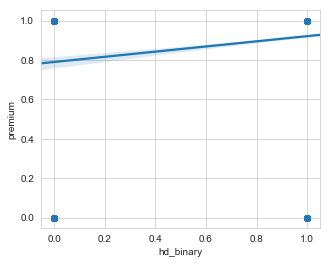

In [176]:
sns.regplot(x='hd_binary',y='premium', data=df, scatter=True)

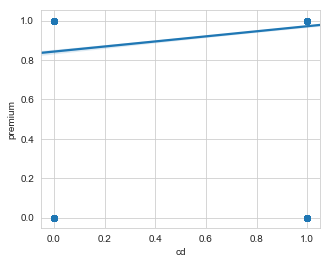

In [177]:
sns.regplot(x='cd',y='premium', data=df, scatter=True)

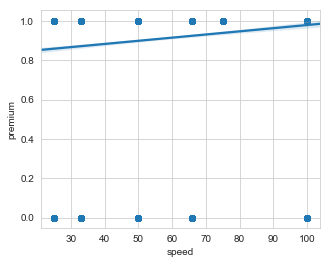

In [178]:
sns.regplot(x='speed',y='premium', data=df, scatter=True)

## Model 1

In [179]:
df_data=df.ix[:,(1,2,3,4,6,9)].values


y=df.ix[:,(5)].values

x=scale(df_data)

LogReg=LogisticRegression()


LogReg.fit(x,y)
print (LogReg.score(x,y))



0.9146828566863716


In [180]:
y_pred=LogReg.predict(x)
from sklearn.metrics import classification_report

print (classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.71      0.21      0.33       612
          1       0.92      0.99      0.95      5647

avg / total       0.90      0.91      0.89      6259



## Model 2

df_data=df.ix[:,(2,3,4,5)].values
#df_data_names=['hd','speed','ram','screen','cd']

y=df.ix[:,(7)].values

x=scale(df_data)

LogReg=LogisticRegression()


LogReg.fit(x,y)
print (LogReg.score(x,y))

In [182]:
y_pred=LogReg.predict(x)
from sklearn.metrics import classification_report

print (classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.64      0.39      0.48      2598
          1       0.66      0.85      0.74      3661

avg / total       0.65      0.66      0.64      6259



## Model 3

In [183]:
df_data=df.ix[:,(1,2,3,4,6)].values
#df_data_names=['hd','speed','ram','screen','cd']

y=df.ix[:,(5)].values

x=scale(df_data)

LogReg=LogisticRegression()


LogReg.fit(x,y)
print (LogReg.score(x,y))

0.9164403259306598


In [184]:
y_pred=LogReg.predict(x)
from sklearn.metrics import classification_report

print (classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.74      0.22      0.34       612
          1       0.92      0.99      0.96      5647

avg / total       0.90      0.92      0.90      6259



## Model 4

In [185]:
df_data=df.ix[:,(1,2,3,6)].values

y=df.ix[:,(5)].values

x=scale(df_data)

LogReg=LogisticRegression()


LogReg.fit(x,y)
print (LogReg.score(x,y))

0.9162805559993609


In [186]:
y_pred=LogReg.predict(x)
from sklearn.metrics import classification_report

print (classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.76      0.21      0.33       612
          1       0.92      0.99      0.96      5647

avg / total       0.90      0.92      0.89      6259



Out of all the 4 model, the fourth model is the best as all the models have similar precision but 4rth model has the highest recall.